In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
text=pd.read_csv("data_logistic.txt")

In [115]:
text.head()

,X1,X2,X3,X4,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [116]:
x=text.iloc[:,:-1]
y=text.iloc[:,-1]

In [117]:
def normalize(x):
    mins=np.min(x,axis=0)
    maxs=np.max(x,axis=0)
    rng=maxs-mins
    return 1-((maxs-x)/rng)
x=normalize(x)

In [118]:
def onelistmaker(n):
    listofones = [1]*n
    return listofones
ones=onelistmaker(x.shape[0])
# print(ones)
x['X0']=x.insert(0,'X0',ones)
x['X0']=ones



In [119]:
x.head()

,X0,X1,X2,X3,X4
0,1,0.769004,0.839643,0.106783,0.736628
1,1,0.835659,0.820982,0.121804,0.644326
2,1,0.786629,0.416648,0.310608,0.786951
3,1,0.757105,0.871699,0.054921,0.450440
4,1,0.531578,0.348662,0.424662,0.687362


In [120]:
x.shape

(1372, 5)

In [121]:
theta0=np.zeros(x.shape[1])
theta1=np.ones(x.shape[1])
theta2=np.empty(x.shape[1])
theta2.fill(2)
theta=theta0

learning_rate=0.8
epsilon=0.0001

In [122]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
Lambda=0
costfn=[]
def gradient_des(x,y,theta,learning_rate,epsilon):
    z=np.dot(x,theta.T)
    h=sigmoid(z)
    cst=cost(h,y)
    change_cost=1
    no_of_iterations=1
    
    while(change_cost>epsilon):
        old_cost=cst
        gradient=np.dot(x.T,(h-y))/y.shape[0]
        theta-=learning_rate*gradient
        z=np.dot(x,theta.T)
        h=sigmoid(z)
        cst=cost(h,y)
        change_cost=old_cost-cst
        no_of_iterations+=1
        costfn.append(cst)
    return theta,no_of_iterations
m=y.shape[0]

In [123]:
def reg_gradient_des(x,y,theta,learning_rate,epsilon):
    z=np.dot(x,theta.T)
    h=sigmoid(z)
    cst=cost(h,y)+Lambda/(2*m)*sum(theta**2)
    change_cost=1
    no_of_iterations=1
    
    while(change_cost>epsilon):
        old_cost=cst
        gradient=np.dot(x.T,(h-y))/y.shape[0]+(Lambda/m)*theta
        theta-=learning_rate*gradient
        z=np.dot(x,theta.T)
        h=sigmoid(z)
        cst=cost(h,y)+Lambda/(2*m)*sum(theta**2)
        change_cost=old_cost-cst
        no_of_iterations+=1
        costfn.append(cst)
    return theta,no_of_iterations

In [124]:
# theta,no_of_iterations=gradient_des(x,y,theta,learning_rate,epsilon)
print("Estimated coefficients:")
print(theta)
print("No. of iterations:")
print(no_of_iterations)

Estimated coefficients:
[ 0.  0.  0.  0.  0.]
No. of iterations:
1154


In [125]:
theta,no_of_iterations=reg_gradient_des(x,y,theta,learning_rate,epsilon)
print("Estimated coefficients:")
print(theta)
print("No. of iterations:")
print(no_of_iterations)

Estimated coefficients:
[  8.86845795 -11.30582714  -5.36889659  -5.74967758   2.31249871]
No. of iterations:
1022


In [126]:
print(costfn)

[0.67843270323792737, 0.6706682901659301, 0.66517690558402953, 0.66048153371252538, 0.65610887241779781, 0.65190388964332735, 0.64781409054926409, 0.64382043883873052, 0.63991492981007814, 0.63609324232146136, 0.63235231796281977, 0.62868956112046326, 0.6251025742416827, 0.62158907004403163, 0.6181468421482974, 0.61477375489796904, 0.61146773939357246, 0.60822679147348713, 0.60504897025239468, 0.60193239677732124, 0.59887525267109631, 0.59587577873239372, 0.59293227349209998, 0.59004309173412328, 0.58720664299035652, 0.58442139001896798, 0.58168584727429518, 0.57899857937559507, 0.57635819958100531, 0.5737633682722324, 0.57121279145473935, 0.56870521927757645, 0.56623944457632935, 0.56381430144220357, 0.56142866381967682, 0.55908144413482252, 0.5567715919559012, 0.55449809268755046, 0.55225996629956053, 0.55005626609091729, 0.5478860774895834, 0.54574851688827852, 0.54364273051627043, 0.54156789334710675, 0.53952320804198961, 0.53750790392845493, 0.53552123601383073, 0.5335624840329360

In [127]:
i=1
iterlist=[]
for i in range(no_of_iterations-1):
    iterlist.append(i)
    
print(iterlist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

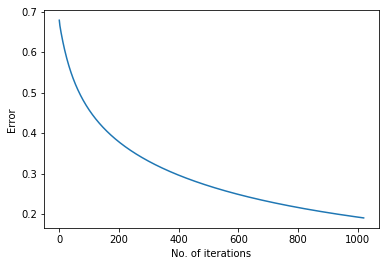

In [128]:
plt.plot(iterlist,costfn)
plt.xlabel('No. of iterations')
plt.ylabel('Error')
plt.show()

In [95]:
def pred_values(theta,x):
    pred_prob=sigmoid(np.dot(x,theta.T))
    pred_value=np.where(pred_prob>=0.5,1,0) 
    return np.squeeze(pred_value)
y_pred=pred_values(theta,x)
print("Correctly predicted labels:", np.sum(y == y_pred)) 
print("Incorrectly predicted labels:", np.sum(y != y_pred)) 
print("Accuracy:", 100*np.sum(y == y_pred)/(np.sum(y == y_pred)+np.sum(y != y_pred)))

Correctly predicted labels: 1278
Incorrectly predicted labels: 94
Accuracy: 93.1486880466
